In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [13]:
def extract_40th_line_columns(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        if len(lines) >= 40:
            if float(lines[39].strip()[0]) == 1:
                deltaG = float(lines[39].strip()[8:14])
            else:
                deltaG = 0
        else:
            deltaG = 0
    return (deltaG)

def ef_cal(score, label, percentage):

    index = np.argsort(score)[::-1]
    score_sort = score[index]
    label_sort = label[index]

    cut_off = round(len(score)*percentage)

    na = 0
    Nx = round(percentage*len(score))
    n = len(label[label == 1])
    N = len(score)

    for i in range(0, cut_off):
        if label[index[i]] == 1:
            na += 1

    EFx = (na/Nx)/(n/N)

    if n < Nx:
        maxef = (n/Nx)/(n/N)
    else:
        maxef = 1/(n/N)

    normalEF = EFx/maxef
    
    return round(EFx,4), round(normalEF,4)

In [8]:
dfs = []

base_dir = "/home/cao-minh-truong/Chemoinformatics/Sem1 Paris Cite/Github/3. Molecular docking/3.2. Docking"

for i in range(1,369):
    folder_name = f"cpd{i}"
    folder_path = os.path.join(base_dir, folder_name)

    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, f"out_cpd{i}.txt")

        if os.path.exists(file_path):

            deltaG = extract_40th_line_columns(file_path)

            dfs.append(deltaG)
        else:
            print(f"File 'out_cpd{i}.txt' not found in {folder_name}")
    else:
        print(f"Folder {folder_name} not found")

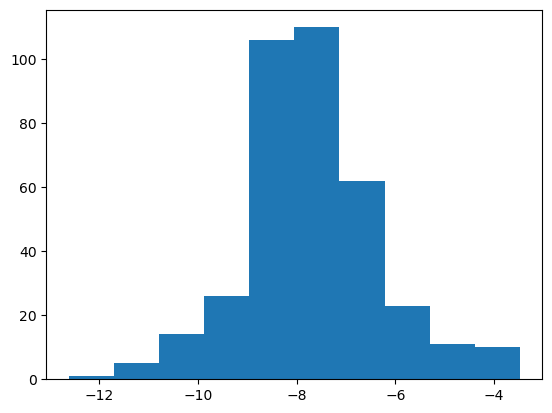

In [17]:
plt.hist(dfs)
plt.show()

In [14]:
label = np.concatenate([np.repeat(1, 169), np.repeat(0, 199)])
abs = np.negative(dfs)
print(f'EF1% {ef_cal(abs, label, 0.01)}')
print(f'EF5% {ef_cal(abs, label, 0.05)}')
print(f'EF10% {ef_cal(abs, label, 0.1)}')

EF1% (1.6331, 0.75)
EF5% (1.3307, 0.6111)
EF10% (1.177, 0.5405)


In [ ]:
df_plot = pd.DataFrame()
df_plot['score'] = dfs
# df_plot.to_csv('df_docking.csv')

,score
0,-8.419
1,-7.930
2,-6.939
3,-6.893
4,-7.993
...,...
363,-7.822
364,-10.240
365,-4.995
366,-8.513
